In [2]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
def Thomas(d0,d1,d2,b):
    # d0 principal, d2 inferior, d1 superior, b sol
	n=d0.shape[0]
	x=np.zeros(n)

	for i in range(n-1):
		a=0.0
		a=d1[i]/d0[i]
		d0[i+1]=d0[i+1]-a*d2[i]
		b[i+1]=b[i+1]-a*b[i]
	
	x=susAtrasDF(d0,d2,b,x)
	return x

In [4]:
# sustitucion hacia atras 
def susAtrasDF(d0,d2,b,x):
    n=d0.shape[0]
    x[n-1]=b[n-1]/d0[n-1]
	
    for i in range(n-2,-1,-1):
        x[i]=(b[i]-d2[i]*x[i+1])/d0[i]
    return x

In [7]:
class Interpolation:
    def __init__(self,datas):
        self.data = datas['data']
        self.n=datas['n']  
        
    def CubicSplines(self):
        h=np.zeros(self.n);alpha=np.zeros(self.n+1);
        DC=np.zeros(self.n+1);DS=np.zeros(self.n);DI=np.zeros(self.n);
        c_j=np.zeros(self.n+1);b_j=np.zeros(self.n);d_j=np.zeros(self.n)
        
        h=self.data[0][1:]-self.data[0][0:-1]
        
        ## Compute the vector B
        for i in range(1,self.n):
            alpha[i]=(3/h[i])*(self.data[1][i+1]-self.data[1][i]) -\
            (3/h[i-1])*(self.data[1][i]-self.data[1][i-1])
            
        for i in range(1,self.n):
            DC[i]=2*(h[i-1]+h[i])
            DS[i-1]=h[i-1]
            DI[i]=h[i]
            
        DC[0]=1.0;DC[-1]=1.0
            
        c_j=Thomas(DC,DS,DI,alpha)
        
        for i in range(self.n):
            b_j[i]=(self.data[1][i+1]-self.data[1][i])*(1/h[i])-\
                (h[i]/3)*(c_j[i+1]+2*c_j[i])
                
            d_j[i]=(c_j[i+1]-c_j[i])/(3*h[i])
            
    
        return {'a_j':self.data[1][:-1],'b_j':b_j,'c_j':c_j[:-1],'d_j':d_j}

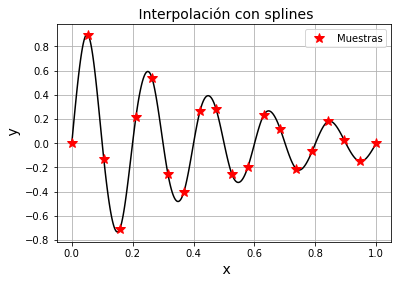

In [8]:
T=[0,0.0526,0.1053,0.1579,0.2105,0.2632,0.3158,0.3684,0.4211,0.4737,
0.5263,0.5789,0.6316,0.6842,0.7368,0.7895,0.8421,0.8947,0.9474,1]

S_t=[0,0.8970,-0.1333,-0.7069,0.2131,0.5410,-0.2531,-0.4007,0.2646,
0.2853,-0.2568,-0.1930,0.2367,0.1211,-0.2098,-0.0670,0.1799,0.0275,
-0.1498,0]

m=500

T=np.array(T); S_t=np.array(S_t);
samples=np.linspace(0.0,1.0,m)

datas={'data':(T,S_t),'n':len(T)-1}
Pol=Interpolation(datas)
Scoef=Pol.CubicSplines()
mm=int(m/len(T));

for i in range(len(T)-1):
    samples=np.linspace(T[i],T[i+1],mm)
    pol_fit=Scoef['a_j'][i]+Scoef['b_j'][i]*(samples-T[i])\
    +Scoef['c_j'][i]*(samples-T[i])**2+Scoef['d_j'][i]*(samples-T[i])**3
    plt.plot(samples,pol_fit,color='black')
    
plt.plot(T,S_t,marker='*',color='red',linestyle=' ',markersize=10,label='Muestras')
plt.grid()
plt.title(" Interpolación con splines",fontsize=14)
plt.xlabel(" x",fontsize=14)
plt.ylabel(" y",fontsize=14)
plt.legend()
plt.show()